<a href="https://colab.research.google.com/github/RamiroCabri1/Telecom_X/blob/main/telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 Librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#---------------

# 🔹 Extracción de datos

En esta sección, procedimos a la extracción de los datos necesarios para nuestro análisis. Los pasos realizados fueron los siguientes:



*   **Definición de la fuente de datos:** Creamos una variable llamada `datos` que almacena la URL donde se encuentra el archivo JSON con la información.  
*   **Carga de los datos:** Utilizamos la función `pd.read_json()` de la librería pandas para leer el archivo JSON directamente desde la URL y cargar su contenido en un DataFrame de pandas, al que nombramos `df_telecomX`.
*   **Primera aproximación:** Para tener una visión inicial de la estructura y el contenido del DataFrame cargado, mostramos las primeras filas utilizando el método `.head()`. Esto nos permite verificar que la carga se realizó correctamente y observar las primeras entradas de los datos.




In [ ]:
# Creacion de la variable con los datos.

datos = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [ ]:
# Se pasa a un pandas dataframe.

df_telecomX = pd.read_json(datos)

In [ ]:
# Primera aproximacion

df_telecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Mirando la cantidad de columnas

df_telecomX.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df_telecomX.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


Se observan solo 5 columnas. La mayoria de ellas tienen poseen anidados.

In [ ]:
customer_normalized = pd.json_normalize(df_telecomX['customer'].tolist(), sep='_')

Para solucionar esto, la función json_normalize() de Pandas aplanará el diccionario que se encuentra dentro de la columna cliente. Posteriormente, eliminaremos la columna original del DataFrame y, finalmente, realizaremos una concatenación de esta columna normalizada con el DataFrame existente. Por último, reiniciaremos los índices para asegurar que el DataFrame quede correctamente definido.

In [ ]:
df_temp = df_telecomX.drop(columns=['customer']).copy()
df_telecomX = pd.concat([df_temp, customer_normalized], axis=1)

In [ ]:
df_telecomX

,customerID,Churn,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


Se puede observar la diferencia: aquí se han generado nuevas columnas con datos que estaban anidados dentro de "customer". Este mismo proceso es el que aplicaré para las columnas restantes.

In [ ]:
phone_normalized = pd.json_normalize(df_telecomX['phone'].tolist(), sep='_')
internet_normalized = pd.json_normalize(df_telecomX['internet'].tolist(), sep='_')
account_normalized = pd.json_normalize(df_telecomX['account'].tolist(), sep='_')

df_temp = df_telecomX.drop(columns=['phone', 'internet', 'account']).copy()
df_telecomX = pd.concat([df_temp, phone_normalized, internet_normalized, account_normalized], axis=1)

Aqui realizamos el mismo proceso para todas las columnas restantes con datos anidados.

In [ ]:
df_telecomX

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#---------------

#🔹 Exploración de Datos
En esta sección, exploramos a fondo el conjunto de datos para comprender su estructura, identificar posibles problemas y visualizar las relaciones entre las variables. Los puntos clave de esta exploración incluyeron:

* **Diccionario de Datos:** Revisamos la descripción de cada columna para entender su significado.
* **Información General (.info()):** Analizamos los tipos de datos y la presencia de valores no nulos en cada columna.
* **Estadísticas Descriptivas (.describe()):** Obtuvimos un resumen estadístico de las columnas numéricas.
* **Verificación de Valores Nulos y Vacíos:** Confirmamos la ausencia de valores nulos (isnull().sum()) y verificamos la presencia de strings vacíos, identificando y tratando los de la columna 'Churn'.
* **Identificación de Tipos de Datos:** Reconocimos la necesidad de convertir la columna 'Charges_Total' a un tipo numérico.
* **Análisis de Valores Únicos:**  Examinamos los valores únicos en las columnas de tipo 'object' para entender la diversidad de categorías y detectar inconsistencias como 'No internet service' y 'No phone service'.
Tratamiento de Valores Categóricos Especiales: Abordamos los valores 'No internet service' y 'No phone service' para estandarizar las columnas relevantes.
* **Conversión de Variables Categóricas a Numéricas:** Mapeamos las columnas binarias ('Yes'/'No') a 1/0 y la columna 'MultipleLines' a valores numéricos (0, 1, 2).
Creación de Nueva Columna: Calculamos la columna "Cuentas Diarias".

## Diccionario :

**CustomerID**: número de identificación único de cada cliente





**Churn**: si el cliente dejó o no la empresa

**Gender**: género (masculino y femenino)

**SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner**: si el cliente tiene o no una pareja

**Dependents**: si el cliente tiene o no dependientes

**Tenure**: meses de contrato del cliente

**PhoneService**: suscripción al servicio telefónico

**MultipleLines**: suscripción a más de una línea telefónica

**InternetService**: suscripción a un proveedor de internet

**OnlineSecurity**: suscripción adicional de seguridad en línea

**OnlineBackup**: suscripción adicional de respaldo en línea


**DeviceProtection**: suscripción adicional de protección del dispositivo

**TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV**: suscripción de televisión por cable

**StreamingMovies**: suscripción de streaming de películas

**Contract**: tipo de contrato

**PaperlessBilling**: si el cliente prefiere recibir la factura en línea

**PaymentMethod**: forma de pago

**Charges_Monthly**: total de todos los servicios del cliente por mes

**Charges_Total**: total gastado por el cliente





Teniendo todas las columnas finalizadas, se puede comenzar a ver en mas detalle las caracteristicas del data frame.

## Nan, nulos y funcion describe e info.

In [ ]:
df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Como se puede observar, solo existen tres columnas con datos de tipo numérico. Esto requiere que convirtamos a tipo numérico algunas de ellas, dado que contienen valores que representan números. Previamente, sería crucial verificar la ausencia de valores nulos (NaN), ya que su presencia podría introducir sesgos y afectar la precisión de los resultados esperados.

In [ ]:
# Usamos el metodos isnull

df_telecomX.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


No se observan valores de tipo nulos.

In [ ]:
# Tambien chequeamos por filas con datos vacios.
print("\nStrings vacios:")
for col in df_telecomX.columns:
     if df_telecomX[col].dtype == 'object':
         print(f"{col}: {(df_telecomX[col] == '').sum()}")


Strings vacios:
customerID: 0
Churn: 224
gender: 0
Partner: 0
Dependents: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
Charges_Total: 0


La columna "Churn" presenta 224 celdas con strings vacíos. Dado que esta columna indica si un cliente ha abandonado la empresa, la presencia de estos valores vacíos sugiere datos faltantes.

Existen dos enfoques para manejar esta situación: eliminar las filas con estos strings vacíos, asumiendo que representan información ausente, o retenerlas en el dataset. Sin embargo, es crucial ser extremadamente precavido si se opta por no eliminarlas, ya que estos datos incompletos pueden introducir sesgos y afectar significativamente la precisión de los algoritmos de Machine Learning subsiguientes. En este caso particular, se procederá a eliminar las filas afectadas.

In [ ]:
# Elimino filas donde la columna 'Churn' es un string vacío
df_telecomX = df_telecomX[df_telecomX['Churn'] != ''].copy()

df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

## Numericos y categoricos.

Si observamos nuevamente el dataset vamos a ver que una columna tiene datos de tipo objeto que representan valores numericos. Esto hace necesario modificar los mismos. La columna "Charges_Total" debe ser modificada.

In [ ]:
df_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
# Convertir columnas a tipo numérico.
# La opción 'coerce' reemplazará los valores que no se puedan convertir con NaN (Not a Number)

df_telecomX["Charges_Total"] = pd.to_numeric(df_telecomX["Charges_Total"], errors='coerce')
df_telecomX.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

La columna Charges_Total se conviertio a numerica.

In [ ]:
df_telecomX.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Verificacion de valores en cada columna.

In [ ]:
 # Verificar valores únicos en columnas de tipo 'object'
for col in df_telecomX.columns:
    if df_telecomX[col].dtype == 'object':
        print(f"Columna '{col}': {df_telecomX[col].unique()}")

Columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'Churn': ['No' 'Yes']
Columna 'gender': ['Female' 'Male']
Columna 'Partner': ['Yes' 'No']
Columna 'Dependents': ['Yes' 'No']
Columna 'PhoneService': ['Yes' 'No']
Columna 'MultipleLines': ['No' 'Yes' 'No phone service']
Columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Columna 'TechSupport': ['Yes' 'No' 'No internet service']
Columna 'StreamingTV': ['Yes' 'No' 'No internet service']
Columna 'StreamingMovies': ['No' 'Yes' 'No internet service']
Columna 'Contract': ['One year' 'Month-to-month' 'Two year']
Columna 'PaperlessBilling': ['Yes' 'No']
Columna 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Nos encontramos ante la siguiente situación:

Las columnas ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] presentan una particularidad. Cada una contiene tres valores posibles: "Sí", "No" y "No tiene servicio de internet". La complejidad reside en determinar si es apropiado considerar la opción "No tiene servicio de internet" como equivalente a un "No", o si, por el contrario, debería tratarse como una categoría distinta debido a su implicación particular en la ausencia del servicio.

In [ ]:
count = 0
for i in df_telecomX['OnlineBackup']:
   if i == 'No internet service':
      count += 1
print(count)

1526


Las columnas 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' y 'StreamingMovies' presentan una particularidad en sus valores: "Sí", "No" y "No internet service". Es evidente que estos valores están directamente relacionados con actividades que requieren conexión a internet y su disponibilidad. Por otro lado, la columna 'MultipleLines' contiene, entre otros, el valor "No phone service", que alude claramente a la inexistencia de líneas o servicios telefónicos, sin hacer referencia necesaria a una conexión a internet.

Es crucial destacar que ambos escenarios representan situaciones distintas y no son directamente comparables.

En cuanto a los datos, el código de esta celda revela que el valor "No internet service" aparece un total de 1526 veces en la columna 'OnlineBackup'.

Considerando que "No internet service" implica la ausencia de un servicio de internet, se infiere que si un cliente no posee internet para un servicio como 'OnlineSecurity' o 'TechSupport' (por citar ejemplos), tampoco debería tenerlo para el resto de los servicios dependientes de internet. Por consiguiente, se espera que en cada una de estas columnas ('OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') también se registren 1526 ocurrencias del valor "No internet service".



In [ ]:
columnas = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

conteo_distintos_a_si_no = {col: ((df_telecomX[col] != 'Yes') & (df_telecomX[col] != 'No')).sum() for col in columnas}

conteo_distintos_a_si_no

{'MultipleLines': np.int64(682),
 'OnlineSecurity': np.int64(1526),
 'OnlineBackup': np.int64(1526),
 'DeviceProtection': np.int64(1526),
 'TechSupport': np.int64(1526),
 'StreamingTV': np.int64(1526),
 'StreamingMovies': np.int64(1526)}

Como se puede observar en este diccionario, creado para alojar como clave el tipo de servicio y como valor la respuesta distinta a "Sí" o "No", en todos los casos nos encontramos con 1526 ocurrencias de "No internet service".

Por lo tanto, queda claro que existe una equivalencia entre este valor y "No", ya que para que la empresa pueda brindar el servicio correspondiente, la conexión a internet es una condición lógica previa e indispensable. Sin acceso a internet, el cliente no podrá utilizar dicho servicio, lo que nos lleva a considerar "No internet service" como un "No" funcional.

Teniendo esto en cuenta, podemos descartar otras opciones, como la aplicación de One-Hot Encoding. Aunque esta técnica sería útil para codificar variables categóricas al crear columnas binarias para cada valor único, en este escenario resultaría en una expansión innecesaria del DataFrame telecomX, aumentando su dimensionalidad sin aportar información adicional relevante.

In [ ]:
# Lista de columnas a modificar.
columnas_internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Reemplazar 'No internet service' por 'No' en las columnas especificadas.
for col in columnas_internet_service:
  df_telecomX[col] = df_telecomX[col].replace('No internet service', 'No')

# Verificar los valores únicos.
for col in columnas_internet_service:
    print(f"Columna '{col}': {df_telecomX[col].unique()}")

# Verificar los valores únicos para la columna MultipleLines (que tiene 'No phone service')
print(f"Columna 'MultipleLines': {df_telecomX['MultipleLines'].unique()}")

Columna 'OnlineSecurity': ['No' 'Yes']
Columna 'OnlineBackup': ['Yes' 'No']
Columna 'DeviceProtection': ['No' 'Yes']
Columna 'TechSupport': ['Yes' 'No']
Columna 'StreamingTV': ['Yes' 'No']
Columna 'StreamingMovies': ['No' 'Yes']
Columna 'MultipleLines': ['No' 'Yes' 'No phone service']


Finalmente, nos resta analizar el valor 'No phone service' presente en la columna "MultipleLines".

Este valor se encuentra 682 veces en el DataFrame. Aunque su incidencia es menor en comparación con otras categorías, este número no es insignificante como para ser ignorado en los análisis posteriores.

Es importante diferenciar las implicaciones: si un cliente no posee servicio telefónico, lógicamente tampoco podrá tener múltiples líneas. Sin embargo, si un cliente no tiene múltiples líneas, esto solo significa que no dispone de más de una, lo cual no implica necesariamente la ausencia total de servicio telefónico. Por lo tanto, estas son dos situaciones distintas que requieren un tratamiento diferenciado.

La solución más adecuada que proponemos para el análisis y futuro modelado es convertir esta columna categórica en una variable numérica que represente la "cantidad" de líneas. Este enfoque se conoce como mapeo ordinal, dado que las categorías poseen un orden intrínseco.

La lógica de mapeo es la siguiente:


*   'No' → 1 línea
*   'Yes' → 2 o más líneas (lo representamos como 2)
*   'No phone service' → 0 líneas





In [ ]:
mapeo_lineas = {
    'No phone service': 0,
    'No': 1,
    'Yes': 2
}

# Utilizamos la funcion map para hacer la modificacion.

df_telecomX['MultipleLines'] = df_telecomX['MultipleLines'].map(mapeo_lineas)

## Estandarización y transformación de datos.

Parte de esta estandarizacion ya se hizo mas arriba con las columnas 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.

Ahora vamos a proceder a modificar Yes y No a 0 y 1, preparando los datos para luego utilizar algotirmos de ML, pasando de datos categoricos a numericos.

In [ ]:
mapeo_lineas = {

    'No': 0,
    'Yes': 1
}

control_a_mapetar =['PaperlessBilling','PhoneService','Partner','Churn','Dependents','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Utilizamos la funcion map para hacer la modificacion.

for i in control_a_mapetar:
  df_telecomX[i] = df_telecomX[i].map(mapeo_lineas)

In [ ]:
df_telecomX.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,1,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,2,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,1,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,1,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,1,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
for col in df_telecomX.columns:
    print(f"Columna '{col}': {df_telecomX[col].unique()}")

Columna 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'Churn': [0 1]
Columna 'gender': ['Female' 'Male']
Columna 'SeniorCitizen': [0 1]
Columna 'Partner': [1 0]
Columna 'Dependents': [1 0]
Columna 'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Columna 'PhoneService': [1 0]
Columna 'MultipleLines': [1 2 0]
Columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Columna 'OnlineSecurity': [0 1]
Columna 'OnlineBackup': [1 0]
Columna 'DeviceProtection': [0 1]
Columna 'TechSupport': [1 0]
Columna 'StreamingTV': [1 0]
Columna 'StreamingMovies': [0 1]
Columna 'Contract': ['One year' 'Month-to-month' 'Two year']
Columna 'PaperlessBilling': [1 0]
Columna 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automa

In [ ]:
# Creacion de nueva columna con la facturacion diaria. Calcula como la division de la facturacion mensual y 31 dias.

df_telecomX["Cuentas Diarias"] = df_telecomX["Charges_Monthly"] /31

In [ ]:
df_telecomX['Charges_Total'].isnull().sum()
# Localize 11 nan que antes no estaban, no encuentro el origen, pero procedo a tratarlos.

np.int64(11)

In [ ]:
df_telecomX['Charges_Total'].fillna(0, inplace=True)

# se modifican a 0

/tmp/ipython-input-136-2978327278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecomX['Charges_Total'].fillna(0, inplace=True)


🔹 Carga y análisis.
En esta sección, procederemos a analizar los datos limpios y transformados para identificar patrones y relaciones clave.

Realizaremos un análisis descriptivo de las variables numéricas.
Visualizaremos la distribución del comportamiento de abandono (Churn).
Exploraremos la relación del Churn con variables categóricas y numéricas relevantes.
Generaremos y analizaremos una matriz de correlación para entender las interrelaciones entre las variables y el Churn.

## Análisis Descriptivo.

In [ ]:
df_telecomX.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,1,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.116129
1,0003-MKNFE,0,Male,0,0,0,9,1,2,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.932258
2,0004-TLHLJ,1,Male,0,0,0,4,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.383871
3,0011-IGKFF,1,Male,1,1,0,13,1,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.161290
4,0013-EXCHZ,1,Female,1,1,0,3,1,1,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.706452


In [ ]:
df_telecomX.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges_Monthly,Charges_Total,Cuentas Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,1.325004,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.089087
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,0.970647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.588710
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.145161
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.269355
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.898387
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.830645


Analisis decriptivo.

Características Clave y Observaciones:



2. Datos Demográficos de los Clientes:

SeniorCitizen: El 16.21% de los clientes son ciudadanos mayores.

Partner: El 48.30% de los clientes tienen un socio, lo que sugiere que casi la mitad son parte de una pareja o unidad familiar.

Dependents: El 29.96% de los clientes tienen dependientes.

3. Antigüedad del Cliente (Tenure):

La tenure (antigüedad) promedio es de aproximadamente 32.37 meses (alrededor de 2 años y 8 meses).

Existe una amplia dispersión en la antigüedad, con una desviación estándar de 24.56 meses.

El 50% de los clientes tienen 29 meses o menos de antigüedad, y el 75% tienen 55 meses o menos. Esto indica que una parte significativa de la base de clientes podría ser relativamente nueva o de mediana antigüedad.

4. Servicios Contratados:

PhoneService: La gran mayoría de los clientes (90.32%) tienen servicio telefónico.

MultipleLines: El valor medio de MultipleLines (1.325) sugiere que algunos clientes tienen múltiples líneas, aunque la mayoría probablemente solo tiene una (dado el min de 0 y el max de 2).

Servicios Adicionales (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):

La primera imagen muestra promedios bajos (o valores binarios en 0) para TechSupport, StreamingTV, y StreamingMovies en las primeras filas, aunque otras filas muestran valores que sugieren la presencia de estos servicios.

La segunda imagen, con los mean valores para OnlineSecurity (0.2867), OnlineBackup (0.3449) y DeviceProtection (0.3439), indica que menos de un tercio de los clientes utilizan estos servicios de seguridad, respaldo o protección de dispositivos. Esto podría ser un área de oportunidad para la empresa, o bien, una indicación de que estos servicios no son atractivos para la mayoría.

5. Información de Facturación y Cargos:

PaperlessBilling: La primera imagen muestra un promedio de 0.592219, lo que sugiere que casi el 60% de los clientes tienen facturación sin papel. Esto es una tendencia positiva hacia la digitalización.

Charges_Monthly: La primera imagen muestra diferentes promedios de cargos mensuales (e.g., 64.76, 30.09, 18.25), lo que sugiere una variedad en los planes o paquetes de servicios contratados.

Charges_Total: Los cargos totales son significativamente más altos, como es de esperar, reflejando el acumulado de los cargos mensuales a lo largo de la antigüedad del cliente.

Análisis General y Potenciales Implicaciones:

Vulnerabilidad al Abandono: La tasa de abandono del 26.54% es considerable y representa un desafío importante para la retención de clientes.

Factores de Retención/Abandono: Es probable que la antigüedad (tenure), la disponibilidad de servicios adicionales (como soporte técnico, seguridad en línea, streaming) y los patrones de facturación (Charges_Monthly, Charges_Total, PaperlessBilling) sean factores clave que influyan en el abandono. Los clientes con mayor antigüedad podrían ser más estables, mientras que aquellos que no contratan servicios adicionales podrían ser más propensos a abandonar si no ven valor añadido.

Oportunidades de Venta Cruzada (Cross-selling): La baja adopción de servicios como OnlineSecurity, OnlineBackup y DeviceProtection sugiere una oportunidad para la empresa de promocionar estos servicios entre su base de clientes existente, lo que podría aumentar el valor del cliente y potencialmente reducir el abandono al hacer que los clientes estén más "enganchados" con la oferta de la empresa.

Segmentación de Clientes: Los datos demográficos (SeniorCitizen, Partner, Dependents) pueden ser utilizados para segmentar a los clientes y personalizar estrategias de marketing y retención. Por ejemplo, los ciudadanos mayores o clientes con dependientes podrían tener diferentes necesidades o preferencias.

Importancia de la Antigüedad: La dispersión en la antigüedad indica que la empresa debe considerar diferentes estrategias para clientes nuevos, medianos y de larga duración. Los clientes nuevos podrían ser más volátiles, mientras que los de larga duración podrían requerir programas de lealtad específicos.

## Outliers.




A continuación, procederemos a una fase crucial de nuestro análisis: la exploración de outliers en las variables numéricas de nuestro conjunto de datos ya transformado. Esta etapa es fundamental porque los valores atípicos, o outliers, pueden distorsionar significativamente las estadísticas descriptivas y llevar a conclusiones erróneas. Para identificar estos valores, utilizaremos diagramas de caja (boxplots), una herramienta visual efectiva que nos permite detectar la dispersión de los datos y señalar aquellos puntos que se desvían sustancialmente del patrón general. Es importante destacar que centraremos esta búsqueda exclusivamente en las variables que son de naturaleza numérica continua o discreta con un rango significativo de valores, excluyendo las variables categóricas y binarias, ya que en estas últimas la noción de outlier en el sentido tradicional no aplica.

Las columnas a analizar son : tenure, Charges_Monthly, Charges_Total y Cuentas Diarias.

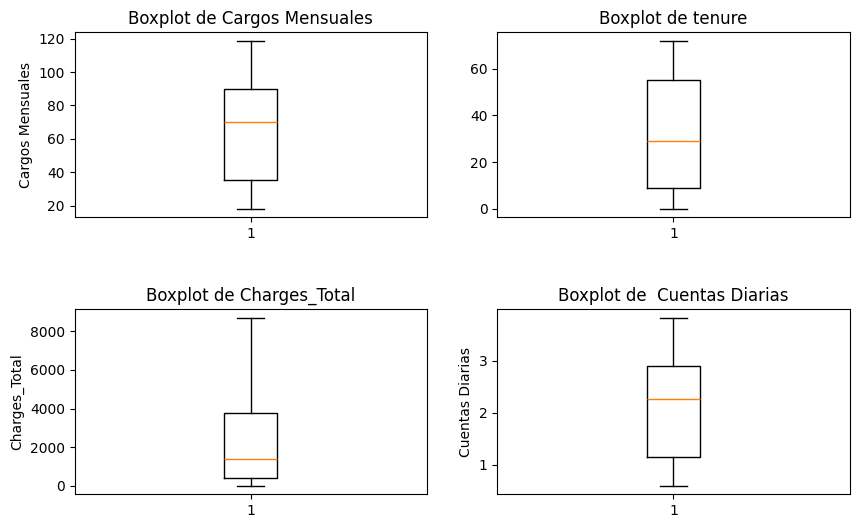

In [ ]:


fig ,ax = plt.subplots(2,2,figsize=(10, 6))
ax[0][0].boxplot(df_telecomX['Charges_Monthly'])
ax[0][0].set_title('Boxplot de Cargos Mensuales')
ax[0][0].set_ylabel('Cargos Mensuales')
ax[0][1].boxplot(df_telecomX['tenure'])
ax[0][1].set_title('Boxplot de tenure')
ax[1][0].boxplot(df_telecomX['Charges_Total'])
ax[1][0].set_title('Boxplot de Charges_Total')
ax[1][0].set_ylabel('Charges_Total')
ax[1][1].boxplot(df_telecomX['Cuentas Diarias'])
ax[1][1].set_title('Boxplot de  Cuentas Diarias')
ax[1][1].set_ylabel('Cuentas Diarias')
plt.subplots_adjust(hspace=0.5) # Ajusta la distancia horizontal entre graficos.
plt.show()



A continuación, se presenta una descripción concisa de la distribución de las variables numéricas clave de nuestro conjunto de datos, observadas a través de los boxplots:

Este conjunto de cuatro boxplots (diagramas de caja y bigotes) muestra la distribución de las variables numéricas clave de los clientes: "Cargos Mensuales", "tenure" (antigüedad), "Charges_Total" (cargos totales) y "Cuentas Diarias".

**Boxplot de Cargos Mensuales:** La mayoría de los clientes tienen cargos mensuales entre aproximadamente $35 y $95, con una mediana alrededor de $70.

**Boxplot de tenure:** La mitad de los clientes tiene una antigüedad entre aproximadamente 10 y 55 meses, con una mediana cercana a los 30 meses. Esto indica una distribución considerable de antigüedad.

**Boxplot de Charges_Total:** Los cargos totales de los clientes se concentran principalmente entre $300 y $3800, con una mediana alrededor de $1400. Se observa una mayor dispersión y presencia de valores atípicos superiores, lo cual es esperable ya que es un acumulado.

**Boxplot de Cuentas Diarias:** La mayoría de los clientes se sitúan entre 1 y 3 "Cuentas Diarias", con una mediana en 2. Esto sugiere que la mayoría de los clientes tiene pocas de estas cuentas o interacciones.

En ningun caso encontramos valores de tipo "oulier".


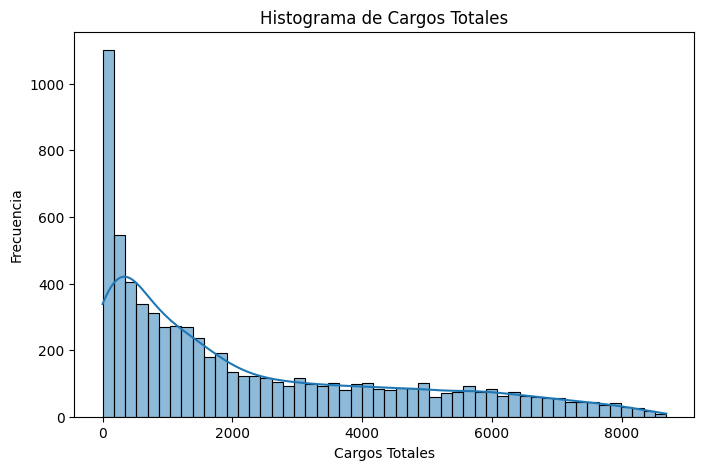

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_telecomX['Charges_Total'], bins=50, kde=True)
plt.title('Histograma de Cargos Totales')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')
plt.show()

Es interesante notar que existen muchos clientes con costos totales iguales a 0.



#---------------












# 🔹 Carga y análisis.

En esta sección, procederemos a analizar los datos limpios y transformados para identificar patrones y relaciones clave.

* Realizaremos un **análisis descriptivo** de las variables numéricas.
* Visualizaremos la **distribución** del comportamiento de abandono (Churn).
* Exploraremos la relación del Churn con variables categóricas y numéricas relevantes.
* Generaremos y analizaremos una **matriz de correlación** para entender las interrelaciones entre las variables y el Churn.

###   Churn

**Comportamiento de Abandono.**


El "churn" o comportamiento de abandono se refiere a la tasa de clientes que dejan de utilizar un servicio o producto dentro de un período de tiempo determinado. Esta es una métrica crítica para las empresas, dado que un alto índice de churn es un indicador directo de pérdida de clientes y, consecuentemente, de potenciales ingresos. El análisis de este comportamiento nos permite identificar patrones y los factores subyacentes que impulsan a los clientes a marcharse, con el fin de desarrollar e implementar estrategias de retención efectivas.

En las celdas subsiguientes, profundizaremos en el análisis de este comportamiento para aproximarnos a sus causas. Dividiremos nuestra examinación en función de variables categóricas y numéricas, y complementaremos este estudio con la presentación de una matriz de correlación, la cual ofrecerá una perspectiva más clara sobre las interrelaciones entre las variables y el churn.

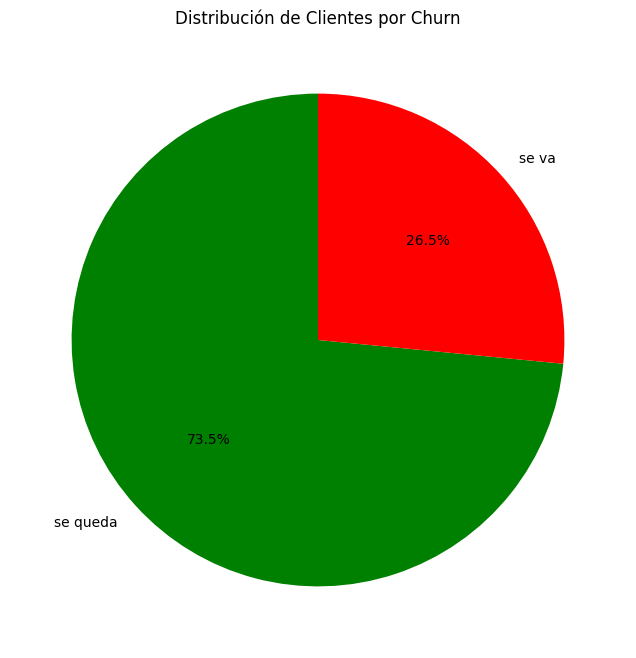

In [ ]:
churn_counts = df_telecomX['Churn'].value_counts()
churn_labels = ["se queda","se va"]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax.set_title('Distribución de Clientes por Churn')
plt.show()



El mean (media) de Churn es 0.265370, lo que indica que, aproximadamente, el 26.54% de los clientes ha abandonado la compañía. Este valor representa una métrica crucial para evaluar la salud de la base de clientes y la tasa de retención.

Con el fin de profundizar en las razones por las cuales un cliente permanece o se da de baja del servicio, se procederá a comparar la variable Churn con otras variables disponibles en el dataset. Mediante la representación gráfica de estas relaciones, se buscará identificar patrones y extraer conclusiones que permitan comprender mejor el comportamiento de abandono.

#### A. Variables categoricas.

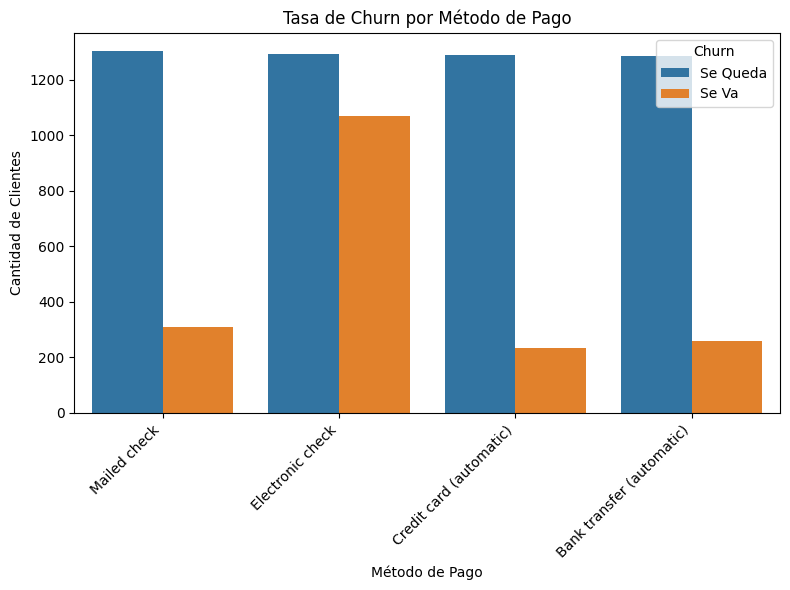

In [ ]:
# Usamos la libreria seaborn y utilizaremos el grafico countplot para graficar.

# Comparacion con Metodos de pago.

plt.figure(figsize=(8, 6))
sns.countplot(data=df_telecomX, x='PaymentMethod', hue='Churn')
plt.title('Tasa de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Se Queda', 'Se Va'])
plt.tight_layout()
plt.show()

Electronic check (Cheque electrónico): Este método de pago presenta la mayor cantidad de clientes que se van (churn) en comparación con los otros métodos. Aunque también tiene un alto número de clientes que se quedan, la proporción de abandono es notablemente superior aquí.

Mailed check (Cheque por correo), Credit card (automatic) (Tarjeta de crédito - automático), y Bank transfer (automatic) (Transferencia bancaria - automática): Estos tres métodos de pago muestran patrones de churn relativamente similares y mucho más bajos en comparación con el "Electronic check". La gran mayoría de los clientes que utilizan estos métodos tienden a quedarse con la empresa.

En resumen, los clientes que utilizan el "Electronic check" como método de pago son los que tienen mayor propensión a hacer churn, lo que sugiere que podría haber alguna fricción o insatisfacción asociada a este método específico.

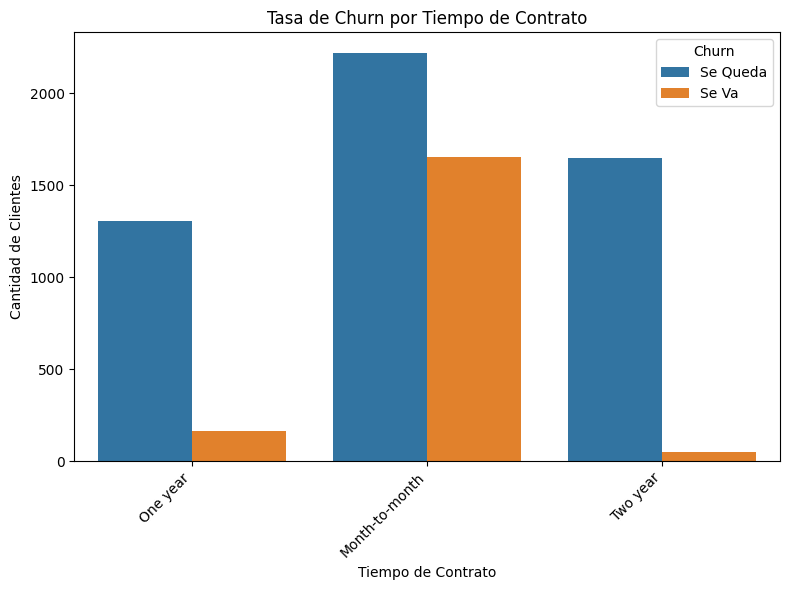

In [ ]:
# Comparamos Churn con Tiempo de Contrato.

plt.figure(figsize=(8, 6))
sns.countplot(data=df_telecomX, x='Contract', hue='Churn')
plt.title('Tasa de Churn por Tiempo de Contrato')
plt.xlabel('Tiempo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Se Queda', 'Se Va'])
plt.tight_layout()
plt.show()

El gráfico nos presenta tres categorías de contratos:

**"One year" (Un año):** La gran mayoría de los clientes con contratos de un año se quedan, mientras que solo una pequeña proporción de ellos se va.

**"Month-to-month" (Mes a mes):**Esta categoría muestra la mayor cantidad total de clientes. Aunque un número considerable de clientes se queda, también hay una cantidad muy alta de clientes que se van, siendo esta la categoría con el mayor churn absoluto.

**"Two year" (Dos años):**Al igual que en los contratos de un año, la vasta mayoría de los clientes con contratos de dos años permanecen, y la tasa de churn es muy baja en esta categoría.

En resumen, el gráfico indica que los contratos mes a mes son los que experimentan la mayor tasa de abandono de clientes (churn), en contraste con los contratos a largo plazo (de uno y dos años) que presentan una tasa de churn considerablemente menor.

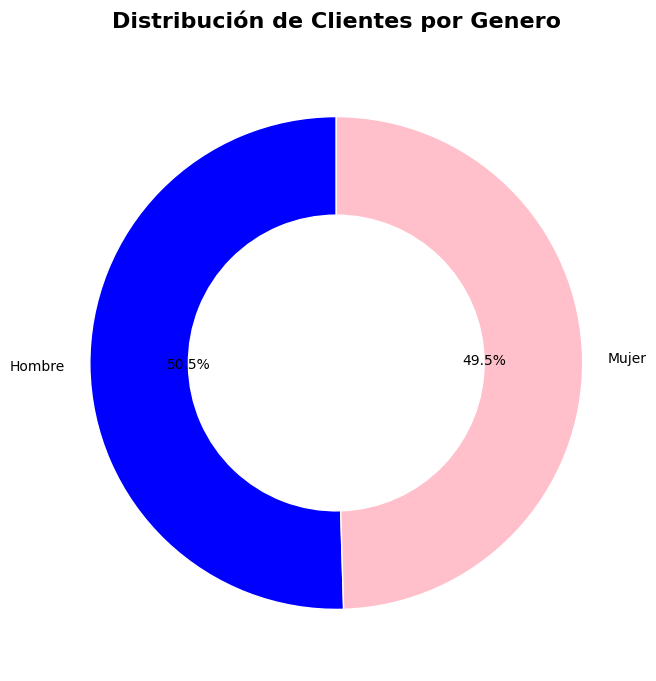

In [ ]:
# Antes de analizar Churn con genero, es interesante ver como se compone el dataset en este aspecto.

gender_counts = df_telecomX['gender'].value_counts()
gender_labels = ["Hombre","Mujer"]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_counts,
       labels=gender_labels,
       autopct='%1.1f%%',
       startangle=90,
       colors=['blue', 'pink'],
       wedgeprops={'edgecolor': 'white', 'width': 0.4}
       )
ax.set_title('Distribución de Clientes por Genero',fontsize=16, fontweight='bold', pad=20)
plt.show()

No existe una division significativa.

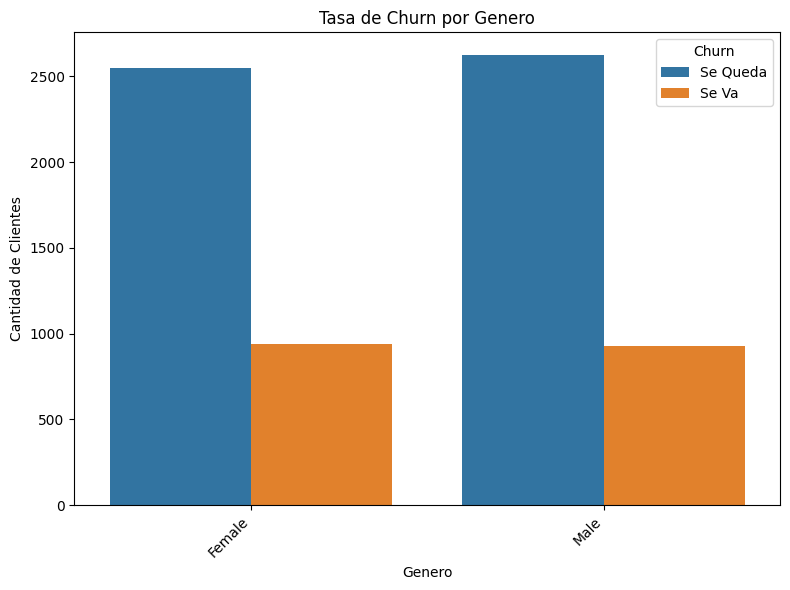

In [ ]:
# Comparamos Churn con el Genero.

plt.figure(figsize=(8, 6))
sns.countplot(data=df_telecomX, x='gender', hue='Churn')
plt.title('Tasa de Churn por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['Se Queda', 'Se Va'])
plt.tight_layout()
plt.show()

Se observa que la base de clientes está bastante equilibrada en cuanto a género, con un número similar de hombres y mujeres. Más importante aún, la proporción de clientes que se quedan versus los que se van no presenta diferencias significativas entre hombres y mujeres. Esto sugiere que el género por sí mismo no es un factor determinante en el comportamiento de abandono para esta empresa.

####B. Variables numericas.

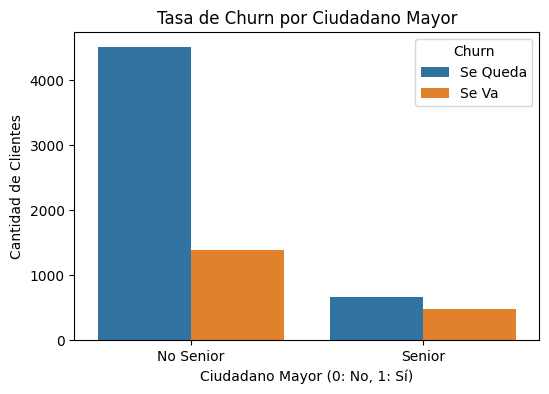

In [ ]:
# Comparamos Churn con SeniorCitizen

plt.figure(figsize=(6, 4))
sns.countplot(data=df_telecomX, x='SeniorCitizen', hue='Churn')
plt.title('Tasa de Churn por Ciudadano Mayor')
plt.xlabel('Ciudadano Mayor (0: No, 1: Sí)')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Se Queda', 'Se Va'])
plt.xticks([0, 1], ['No Senior', 'Senior'])
plt.show()

Es importante señalar que el DataFrame no ofrece una distinción clara en cuanto a la edad real de los clientes, sino que utiliza una clasificación binaria de "Senior" y "No Senior". Esta categorización agrupa a los individuos en rangos de edad no especificados, lo que impide determinar si "Senior" se refiere a, por ejemplo, 40 o 70 años.

Aun así, al comparar los grupos "Senior" y "No Senior", se observa una diferencia notable: los clientes clasificados como "Senior" exhiben una propensión significativamente mayor a darse de baja del servicio en comparación con los "No Senior". Con base en los datos disponibles en este DataFrame, se infiere que la edad (según esta clasificación) parece ser un factor determinante en la decisión de los clientes de abandonar el servicio.

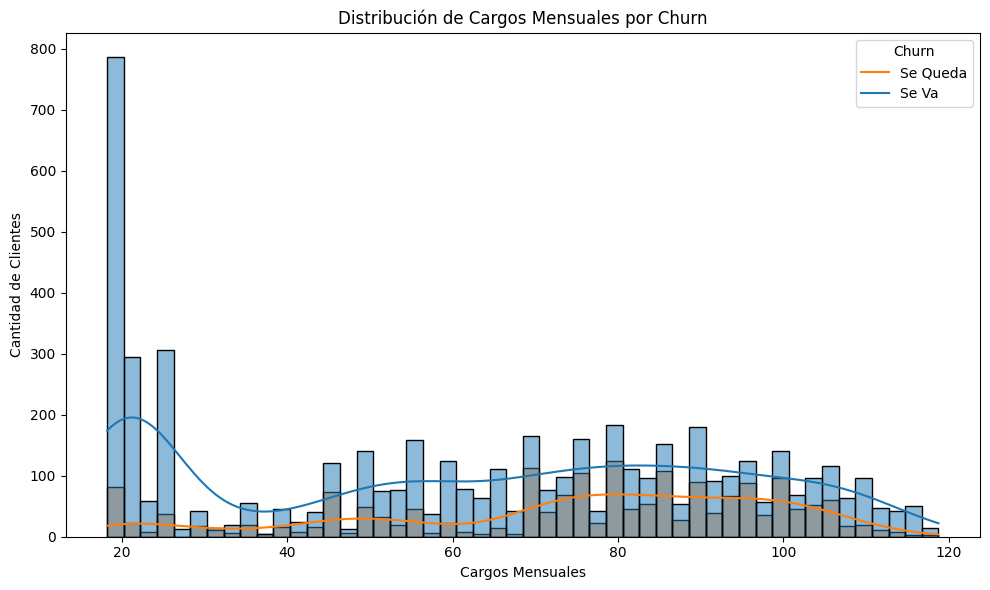

In [ ]:

# Comparamos Churn con Cargos Mensuales.

plt.figure(figsize=(10, 6))

sns.histplot(data=df_telecomX, x='Charges_Monthly', hue='Churn', kde=True,
             palette={0: 'tab:blue', 1: 'tab:orange'},
             bins=50)

plt.title('Distribución de Cargos Mensuales por Churn')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Se Queda', 'Se Va'])
plt.tight_layout()
plt.show()

La variable "Cargos Mensuales" (Charges_Monthly) presenta una naturaleza continua o semi-continua, lo que dificulta su visualización efectiva mediante un gráfico de conteo (countplot). Esto se debe a la gran diversidad de valores posibles, resultando en un número excesivo de barras delgadas e imperceptibles que impiden una interpretación clara.

Por lo tanto, se optó por un gráfico de histogramas superpuestos, el cual ofrece una representación más adecuada de la distribución de los "Cargos Mensuales" en relación con el comportamiento de "Churn".

El análisis de este histograma revela una tendencia clara: a medida que los cargos mensuales aumentan, se observa un incremento en la proporción de clientes que abandonan el servicio. Lo contrario es notable: en rangos de precios bajos, la tasa de deserción es mínima, lo que indica una fuerte retención de clientes.

En definitiva, conforme los cargos mensuales se incrementan, la cantidad de clientes que permanecen en la empresa tiende a disminuir, mientras que la proporción de clientes que se dan de baja (churn) se vuelve más significativa. Esto sugiere que los clientes con facturas más elevadas poseen una mayor propensión al abandono del servicio, o al menos el churn se distribuye de manera más prominente en los segmentos de cargos mensuales superiores.

#### B. Matriz de Correlacion:



Si bien hemos visto la relacion de "churn" con algunas variables en particular, para intentar comprender porque un cliente "se va" o "se queda", lo ideal seria hacer una matriz de correlacion.

La matriz de correlacion mide la "relacion lineal" entre variables, en este caso de "churn" con respecto al resto de las variables de dataFrame.

Esta nos da como resultado una relacion que puede ser mas cercana a 1, a 0 y a -1.
Cuando la correlación es positiva, significa que a medida que la otra variable numérica crece, Churn tiende a ser más cercano a 1.

Cuando la correlación es negativa, significa que a medida que la otra variable numérica crece, Churn tiende a ser más cercano a 0.

Un ejemplo de esto lo podemos ver con el ultimo grafico que realizamos.
En el histograma anterior, vemos que la mayoría de los clientes con Cargos_Mensuales bajos "Se Quedan" (Churn=0), y a medida que los Cargos_Mensuales suben, la proporción de clientes que "Se Va" (Churn=1) aumenta.

Si calcularas la correlación entre Cargos_Mensuales y Churn (donde Churn es 0/1), probablemente obtendremos un valor positivo. Esto indicaría que hay una relación directa: a mayores cargos mensuales, mayor probabilidad de churn.

Dicho todo esto de otra manera, mientras el numero sea positivo y mas cercano a 1 significa que la variable en cuestion tiene una relacion mas directa con churn 1, por lo tanto esa variable es probable ( probable , ya que "correlacion no significa causalidad" ) que afecte a la idea del cliente de abandonar la empresa.

Una matriz de correlacion nos muestra estas relaciones entre variables, es  muy interesante observarla.

Correlación con 'Churn':
Churn               1.000000
Charges_Monthly     0.193356
Cuentas Diarias     0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.036310
PhoneService        0.011942
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
Charges_Total      -0.198324
tenure             -0.352229
Name: Churn, dtype: float64


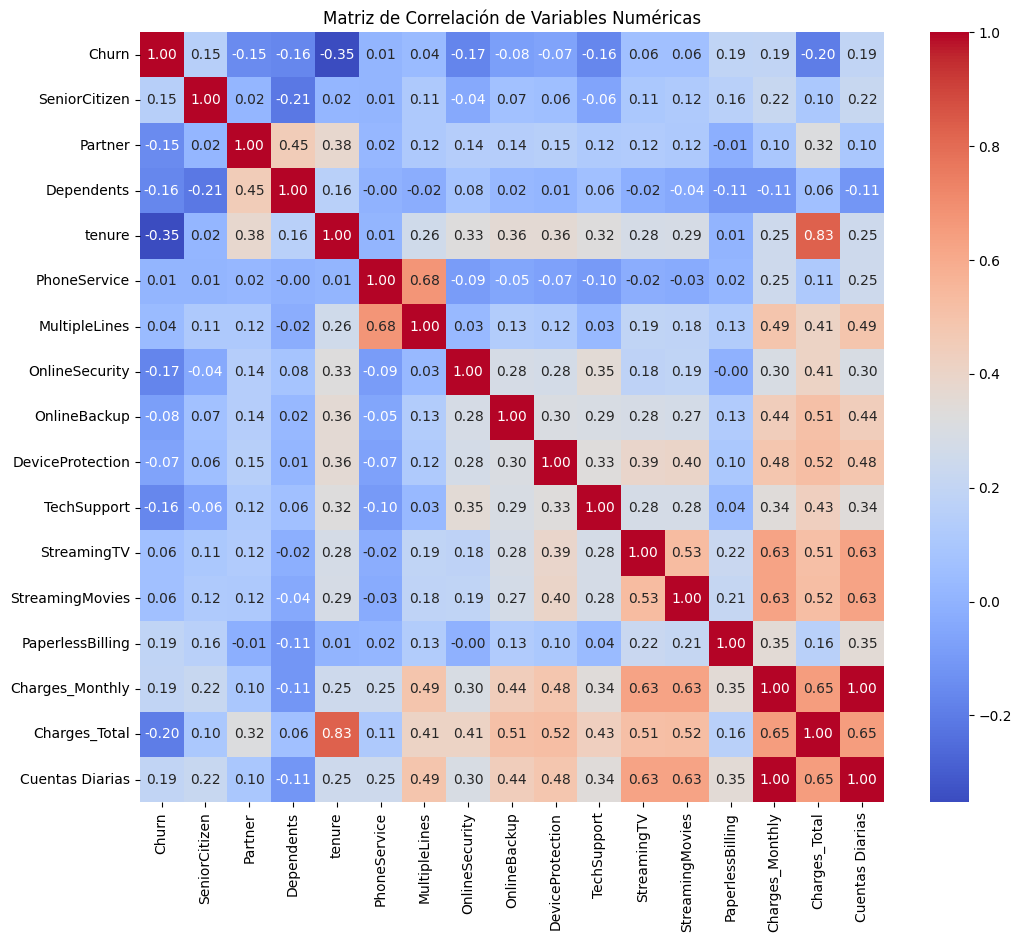

In [ ]:
# Seleccionamos solo las columnas numéricas para la matriz de correlación.
df_numeric = df_telecomX.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación.
correlation_matrix = df_numeric.corr()

# Obtenemos las correlaciones de 'Churn' con las otras variables.
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

print("Correlación con 'Churn':")
print(churn_correlation)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


Como analista de datos, al observar esta matriz de correlación con la variable Churn como eje principal, identifico las siguientes relaciones clave y ofrezco las siguientes recomendaciones para la retención de clientes:

Descripción de la Matriz de Correlación (en relación con Churn):

La matriz muestra cómo cada variable se correlaciona linealmente con la probabilidad de que un cliente abandone la empresa (Churn, donde 1 significa "Se Va").

Correlaciones Positivas (a mayor valor de la variable, mayor probabilidad de Churn):

Charges_Monthly (0.193), Cuentas Diarias (0.193), PaperlessBilling (0.192): Existe una correlación positiva moderada. Esto sugiere que los clientes con cargos mensuales más altos, aquellos que usan "Cuentas Diarias" (asumo que se refiere a una modalidad de cuenta o servicio que implica interacción diaria o facturación diaria) y los que tienen facturación sin papel (PaperlessBilling), tienen una mayor propensión a irse.

SeniorCitizen (0.151): Los clientes de la tercera edad (SeniorCitizen) tienen una ligera mayor propensión al churn.

StreamingTV (0.063), StreamingMovies (0.061), MultipleLines (0.036), PhoneService (0.012): Estas variables muestran correlaciones positivas muy débiles o casi nulas con el churn, lo que indica que no tienen una relación lineal significativa con la partida del cliente.

Correlaciones Negativas (a mayor valor de la variable, menor probabilidad de Churn):

tenure (-0.352): Esta es la correlación negativa más fuerte. Significa que cuanto más tiempo lleva un cliente con la empresa (mayor antigüedad), menor es la probabilidad de que se vaya. Es un predictor muy fuerte de retención.

OnlineSecurity (-0.171), TechSupport (-0.165), Dependents (-0.164), Partner (-0.150), DeviceProtection (-0.066), OnlineBackup (-0.082): Estas variables muestran una correlación negativa moderada a débil. Indican que los clientes que tienen seguridad online, soporte técnico, dependientes, son pareja, tienen protección de dispositivo o copia de seguridad online, tienen una menor tendencia a hacer churn.

Charges_Total (-0.199): Curiosamente, a pesar de que los Charges_Monthly son positivos, el Charges_Total (que asumo es la suma de todos los cargos a lo largo del tiempo) tiene una correlación negativa. Esto podría implicar que los clientes que han acumulado un valor de vida más alto a lo largo de su relación con la empresa tienen menos probabilidades de irse. Esto podría estar muy relacionado con tenure.




#---------------



# Informe Final: Análisis del Comportamiento de Abandono de Clientes (Churn) en TelecomX



## 🔹 Introducción

El presente informe detalla un análisis exhaustivo del comportamiento de abandono de clientes (Churn) en la empresa de telecomunicaciones TelecomX. El objetivo principal de este estudio es identificar los factores clave que influyen en la decisión de los clientes de dejar de utilizar los servicios de la compañía. La evasión de clientes (Churn) representa un desafío significativo para las empresas, ya que implica la pérdida de ingresos y la necesidad de invertir en la adquisición de nuevos clientes para mantener o aumentar la base de usuarios.

Comprender las razones detrás del Churn es fundamental para desarrollar estrategias de retención efectivas, mejorar la satisfacción del cliente y optimizar los recursos de la empresa. A través de este análisis, buscamos proporcionar información valiosa y recomendaciones prácticas para reducir la tasa de abandono en TelecomX.

## 🔹 Limpieza y Tratamiento de Datos

El proceso de análisis comenzó con la importación de los datos desde un archivo JSON. Se realizó una primera exploración del conjunto de datos para comprender su estructura y contenido.

Durante la etapa de limpieza y preprocesamiento, se identificaron y abordaron los siguientes aspectos:

*   **Columnas Anidadas:** Se observó que varias columnas contenían estructuras de datos anidadas (diccionarios). Para facilitar el análisis, se utilizó la función `json_normalize()` de pandas para aplanar estas columnas y crear nuevas columnas a partir de las claves y valores anidados. Las columnas 'customer', 'phone', 'internet', y 'account' fueron normalizadas.

*   **Valores Nulos y Vacíos:** Se verificó la presencia de valores nulos utilizando `isnull().sum()`, no encontrando valores nulos inicialmente. Sin embargo, al verificar por strings vacíos en columnas de tipo 'object', se identificaron 224 strings vacíos en la columna 'Churn'. Dado que esta columna es crucial para nuestro análisis de abandono y los registros vacíos no aportaban información útil, se decidió eliminar las filas correspondientes.

*   **Conversión de Tipos de Datos:** La columna 'Charges_Total' fue identificada como tipo 'object' pero contenía valores numéricos. Se convirtió esta columna a tipo numérico utilizando `pd.to_numeric`, empleando el argumento `errors='coerce'` para tratar posibles errores de conversión, lo que resultó en la aparición de 11 valores NaN. Estos valores NaN en 'Charges_Total' fueron imputados con 0, asumiendo que representan clientes con cargos totales muy bajos o inexistentes al momento de la extracción.

*   **Tratamiento de Valores Categóricos Especiales:** Algunas columnas categóricas relacionadas con servicios ('MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') contenían el valor 'No internet service' o 'No phone service'. Se determinó que 'No internet service' era equivalente a 'No' para las columnas de servicios de internet, por lo que se reemplazó dicho valor por 'No'. Para la columna 'MultipleLines', que contenía 'No phone service', se realizó un mapeo ordinal a valores numéricos (0: No phone service, 1: No - una línea, 2: Yes - múltiples líneas) para representar la cantidad de líneas telefónicas.

*   **Estandarización de Variables Binarias:** Se mapearon las columnas binarias con valores 'Yes' y 'No' a 1 y 0 respectivamente, preparando el dataset para futuros modelos de Machine Learning. Las columnas afectadas fueron: 'PaperlessBilling', 'PhoneService', 'Partner', 'Churn', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.

*   **Creación de Nuevas Características:** Se creó una nueva columna, "Cuentas Diarias", calculada como los cargos mensuales divididos por 31, para obtener una aproximación de la facturación diaria.

Tras estos pasos de limpieza y tratamiento, el dataset quedó preparado para la fase de análisis exploratorio.

## 🔹 Análisis Exploratorio de Datos

Se realizó un análisis exploratorio para comprender mejor la distribución de las variables y su relación con el comportamiento de Churn.

*   **Distribución del Churn:** Se visualizó la proporción de clientes que se quedan ("No") y los que se van ("Yes"). Aproximadamente el 26.54% de los clientes ha abandonado la compañía, lo que confirma la relevancia de estudiar este fenómeno.

*   **Análisis de Outliers:** Se generaron boxplots para las variables numéricas clave ('tenure', 'Charges_Monthly', 'Charges_Total', 'Cuentas Diarias'). Los boxplots no revelaron la presencia de outliers significativos en estas variables, lo que sugiere que los datos numéricos están dentro de rangos esperables para este tipo de negocio.

*   **Histograma de Charges_Total:** Un histograma de los cargos totales mostró una distribución con una concentración notable de clientes con cargos totales bajos, y una cola larga hacia valores más altos, lo cual es coherente con la antigüedad de los clientes. Se observó un número considerable de clientes con cargos totales de 0, posiblemente representando clientes muy nuevos o con servicios gratuitos.

*   **Análisis de Variables Categóricas y Binarias vs. Churn:**

    *   **Método de Pago ('PaymentMethod'):** El análisis por método de pago reveló que los clientes que utilizan 'Electronic check' presentan una tasa de Churn significativamente más alta en comparación con otros métodos como 'Mailed check', 'Credit card (automatic)' y 'Bank transfer (automatic)'. Esto sugiere que la experiencia con el pago electrónico podría ser un punto de fricción para los clientes.

    *   **Tiempo de Contrato ('Contract'):** La duración del contrato tiene un impacto notable en el Churn. Los clientes con contratos 'Month-to-month' (mes a mes) muestran la mayor tasa de abandono. Por el contrario, los contratos de 'One year' y 'Two year' presentan tasas de Churn considerablemente más bajas, indicando que los contratos a largo plazo fomentan la retención.

    *   **Género ('gender'):** La distribución de clientes por género es equilibrada, y no se observaron diferencias significativas en la tasa de Churn entre hombres y mujeres. Esto sugiere que el género no es un factor determinante en el comportamiento de abandono.

    *   **Ciudadano Mayor ('SeniorCitizen'):** A pesar de la clasificación binaria, se observó que los clientes clasificados como 'SeniorCitizen' (1) tienen una mayor propensión al Churn en comparación con los 'No Senior' (0).

*   **Análisis de Variables Numéricas vs. Churn:**

    *   **Cargos Mensuales ('Charges_Monthly'):** La visualización de la distribución de cargos mensuales en relación con el Churn, a través de un histograma superpuesto, mostró que los clientes con cargos mensuales más altos tienen una mayor probabilidad de abandonar el servicio. En rangos de precios bajos, la tasa de Churn es menor.

*   **Matriz de Correlación:** Se calculó y visualizó una matriz de correlación para las variables numéricas. El análisis de la correlación de cada variable con 'Churn' (donde 1 = Se Va) arrojó los siguientes insights clave:

    *   **Correlación Negativa Fuerte:** 'tenure' (-0.352) mostró la correlación negativa más fuerte. Esto confirma que cuanto mayor es la antigüedad del cliente, menor es la probabilidad de que abandone.

    *   **Correlaciones Negativas Moderadas a Débiles:** 'OnlineSecurity', 'TechSupport', 'Dependents', 'Partner', 'DeviceProtection', y 'OnlineBackup' presentaron correlaciones negativas, sugiriendo que la suscripción a estos servicios adicionales y tener un socio o dependientes está asociado con una menor probabilidad de Churn.

    *   **Correlaciones Positivas Moderadas:** 'Charges_Monthly' (0.193), 'Cuentas Diarias' (0.193), y 'PaperlessBilling' (0.192) mostraron correlaciones positivas, indicando que cargos mensuales más altos, la modalidad de "Cuentas Diarias", y la facturación sin papel están asociados con una mayor probabilidad de Churn.

    *   **Correlación Positiva Débil:** 'SeniorCitizen' (0.151) tuvo una correlación positiva débil, reafirmando que los clientes mayores tienen una ligera mayor propensión al Churn.

    *   **Correlación Negativa en Charges_Total:** A pesar de la correlación positiva con 'Charges_Monthly', 'Charges_Total' (-0.199) mostró una correlación negativa con Churn, probablemente debido a su fuerte correlación con 'tenure'.

## 🔹 Conclusiones e Insights

El análisis exploratorio y la matriz de correlación han revelado varios insights clave sobre el comportamiento de Churn en TelecomX:

*   **La Antigüedad es Crucial:** La antigüedad del cliente ('tenure') es el predictor más fuerte de retención. Los clientes que han estado con la empresa por más tiempo son significativamente menos propensos a irse.
*   **Contratos a Largo Plazo Reducen el Churn:** Los clientes con contratos de un año o dos años tienen una tasa de abandono mucho menor que aquellos con contratos mes a mes. La flexibilidad del contrato mes a mes parece facilitar el abandono.
*   **Método de Pago y Churn:** El uso del 'Electronic check' está asociado con una mayor probabilidad de Churn. Podría haber problemas de usabilidad o satisfacción con este método.
*   **Servicios Adicionales Fomentan la Retención:** Los servicios de valor agregado como seguridad online, soporte técnico y protección de dispositivos están correlacionados negativamente con el Churn. Los clientes que utilizan estos servicios tienden a ser más leales.
*   **Altos Cargos Mensuales, Mayor Riesgo de Churn:** Los clientes con facturas mensuales más elevadas son más propensos a abandonar la empresa, sugiriendo una posible insatisfacción con la relación valor-precio percibido.
*   **Clientes Senior y Facturación sin Papel:** Los clientes mayores y aquellos con facturación sin papel muestran una ligera mayor propensión al Churn, aunque la magnitud de esta relación es menor que otros factores.
*   **Género no es un Factor Determinante:** El género del cliente no parece influir significativamente en la probabilidad de Churn.

## 🔹 Recomendaciones

Basado en las conclusiones obtenidas, se proponen las siguientes recomendaciones estratégicas para TelecomX con el fin de reducir la tasa de abandono:

1.  **Fomentar Contratos a Largo Plazo:** Implementar incentivos atractivos para que los clientes opten por contratos de uno o dos años en lugar de la modalidad mes a mes. Esto podría incluir descuentos en tarifas, beneficios adicionales, o promociones exclusivas para contratos de mayor duración.

2.  **Mejorar la Experiencia con el Pago Electrónico:** Investigar las posibles razones detrás de la alta tasa de Churn asociada al 'Electronic check'. Optimizar la interfaz de pago, ofrecer soporte técnico específico para este método, o considerar alternativas si existen problemas subyacentes.

3.  **Promocionar Servicios de Valor Agregado:** Aumentar los esfuerzos de marketing y ventas para destacar los beneficios de los servicios como OnlineSecurity, TechSupport, DeviceProtection y OnlineBackup. Ofrecer pruebas gratuitas o paquetes iniciales con estos servicios incluidos puede motivar a los clientes a adoptarlos y experimentar su valor, aumentando así su lealtad.

4.  **Evaluar la Propuesta de Valor para Clientes de Altos Cargos:** Analizar en detalle a los clientes con altos cargos mensuales. ¿Reciben un valor percibido acorde a su gasto? Considerar ofrecer planes premium, atención al cliente personalizada, o beneficios exclusivos para este segmento para justificar los costos y mejorar la satisfacción.

5.  **Investigar "Cuentas Diarias" y Facturación sin Papel:** Realizar un análisis más profundo sobre la relación entre "Cuentas Diarias", "PaperlessBilling" y Churn. Comprender las posibles insatisfacciones o puntos de fricción asociados a estas modalidades para implementar mejoras.

6.  **Considerar las Necesidades de Clientes Senior:** Adaptar la comunicación, los canales de soporte y posiblemente los paquetes de servicios para satisfacer las necesidades específicas de los clientes mayores, dado su ligera mayor propensión al Churn.

7.  **Programas de Fidelización Temprana:** Dado que la antigüedad es clave, desarrollar programas de bienvenida y fidelización especialmente enfocados en los primeros meses de servicio para establecer una relación sólida con los clientes desde el principio.

La implementación de estas recomendaciones, respaldadas por el análisis de datos, puede ayudar a TelecomX a comprender mejor a sus clientes, mejorar la retención y reducir significativamente la tasa de abandono, contribuyendo así a un crecimiento sostenible.